In [25]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import multi_rake
import re
from wordcloud import WordCloud, STOPWORDS 
from multi_rake import Rake

In [26]:
BB_review = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/BB_Review_All.csv')
#print(BB_review)
BB_review_np = BB_review.to_numpy()
print(BB_review_np)
BB_review_np.shape

[[2 8494462 'notadoubt' ... 0 0 nan]
 [3 8494462 'Panther37' ... 0 0 nan]
 [8 8454488 'PatrickV' ... 0 0 nan]
 ...
 [71652 8708669 'chardd' ... 0 0 nan]
 [71653 8708669 'warrenmonday' ... 0 0 nan]
 [71654 8708669 'Allyria' ... 0 0 nan]]


(29603, 18)

In [27]:
def getKey(text):
    rake=Rake()
    Keywords = re.sub("[^\w]", " ", text)#no special chars
    Keywords = ''.join([i for i in Keywords if not i.isdigit()])
    Keywords=rake.apply(Keywords)
    if Keywords == []:
        return ''
    else:
        return Keywords
a ='Not a DVD'
b = 'covid-19 situation'
getKey(a)

''

In [30]:
BB_review_title = BB_review_np[:,13]
str(getKey(BB_review_title[2]))
#str(BB_review_title[1])
#getKey()

"[('upn lineup', 4.0), ('dj isn', 4.0), ('memo board', 3.5), ('board', 1.5), ('gave', 1.0), ('stars', 1.0), ('featured', 1.0), ('front', 1.0)]"

In [31]:
accum = 0
comment_words = '' 
temp = 'Bestbuy'
temp2 = 'bestbuy'
for i in range(len(BB_review_title)):
    BB_review_title[i] = str(getKey(str(BB_review_title[i])))
    if temp in BB_review_title[i]:
        accum += 1
    elif temp2 in BB_review_title[i]:
        accum += 1
    
     

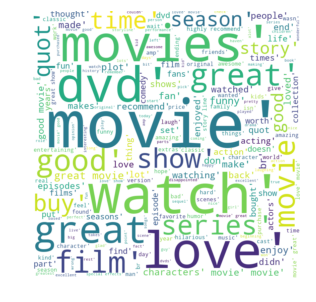

In [32]:
stopwords = set(STOPWORDS) 
comment_words += " ".join(BB_review_title)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        

plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 